To test labs we can start with some infrastructure method to run it with different sequence lenght:

In [1]:
import os
from pathlib import Path
import subprocess
CURRENT_DIR = Path(os.getcwd())
print(CURRENT_DIR)
SCRIPT_DIR = CURRENT_DIR.joinpath('../..')
print(SCRIPT_DIR)
NUMBER_OF_ISLANDS = 4

def execute_labs(sequence_lenght: int):
    os.chdir(SCRIPT_DIR)
    cmd = ['./local_run.sh {}'.format(sequence_lenght)]
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    process.wait()
    os.chdir(CURRENT_DIR)

/home/agent/Studies/Pracownia_projektowa/islands_desync/experiments_interpretations/LABS
/home/agent/Studies/Pracownia_projektowa/islands_desync/experiments_interpretations/LABS/../..


We also need a method to extract the results from each island:

In [2]:
LOGS_PATH = SCRIPT_DIR.joinpath('logs')

def get_latest_dir(current_path: Path) -> Path:
    dir_list = next(os.walk(current_path))[1]
    dir_list.sort()
    latest_dir = dir_list[-1]
    return current_path.joinpath(latest_dir)

def read_end_value_for_island(island: int) -> int:
    filename = 'kontrolW{}End.ctrl.txt'.format(island)
    with open(filename) as f:
        result = int(next(f))
    return result

def gather_latest_results(number_of_islands: int = NUMBER_OF_ISLANDS) -> list:
    day_dir = get_latest_dir(LOGS_PATH)
    labs1_dir = get_latest_dir(LOGS_PATH.joinpath(day_dir))
    hour_dir = get_latest_dir(labs1_dir)
    os.chdir(hour_dir)
    result = []
    for i in range(number_of_islands):
        result.append(read_end_value_for_island(i))
    os.chdir(CURRENT_DIR)
    return result


Then we can check if the algorithm is able to find optimal values for different lenghts.
We can compare the values with the optimal ones from the following publication:
[Low autocorrelation binary sequences](https://www-e.ovgu.de/mertens/pubs/labs-16.pdf)

In [3]:
optimal_values = [(7, 3), (10, 13), (13, 6), (16, 24), (20, 26), (25,36), (30, 59), (35, 73), (40, 108)]
results = []
for sequence_length, _ in optimal_values:
    execute_labs(sequence_length)
    execution_result = gather_latest_results()
    print('Results for {} bits: {}'.format(sequence_length, str(execution_result)))
    results.append(execution_result)

Results for 7 bits: [3, 3, 3, 3]
Results for 10 bits: [13, 13, 21, 13]
Results for 13 bits: [34, 22, 42, 22]
Results for 16 bits: [56, 40, 64, 40]
Results for 20 bits: [58, 58, 58, 58]
Results for 25 bits: [168, 132, 168, 132]
Results for 30 bits: [235, 235, 235, 235]
Results for 35 bits: [325, 317, 325, 317]
Results for 40 bits: [432, 380, 456, 380]


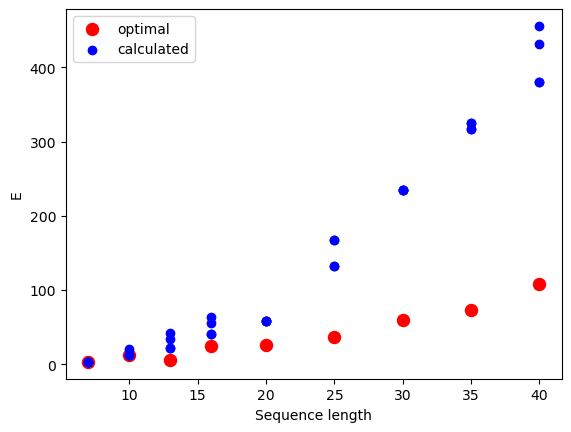

In [4]:
import matplotlib.pyplot as plt

x = [l for l, r in optimal_values]
y = [r for l, r in optimal_values]

fig, ax = plt.subplots()
ax.scatter(x, y, s=75, c='red')
for i in range(NUMBER_OF_ISLANDS):
    y_i = [r[i] for r in results]
    ax.scatter(x, y_i, c='blue')
ax.legend(['optimal', 'calculated'], loc='upper left')
ax.set_xlabel('Sequence length')
ax.set_ylabel('E')
plt.show()

It can be seen on the visualization that the algorithm is working and is able to find the optimal solution for the short sequences. For the longer ones it probably gets stuck in some local minimum and is quite far from optimal solution.
It is possible that having more resources and tweaking some parameters (like selecting migration candidates or mutations) the island genetic algorithm may be able to achieve respectable results event for long sequences.